# Final Project

# Introduction and Background

# Data Description

# Data Cleaning/Pre-processing

In [23]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Load Data from multiple files
carlsbad = pd.read_csv('CARLSBAD CrimeStats_20170516_0235.xls.csv')
chulavista = pd.read_csv('CHULA VISTA CrimeStats_20170516_0236.xls.csv')
coronado = pd.read_csv('CORONADO CrimeStats_20170516_0237.xls.csv')
countysheriff = pd.read_csv('COUNTY SHERIFF CrimeStats_20170516_0237.xls.csv')
elcajon = pd.read_csv('EL CAJON CrimeStats_20170516_0238.xls.csv')
escondido = pd.read_csv('ESCONDIDO CrimeStats_20170516_0239.xls.csv')
lamesa = pd.read_csv('LA MESA CrimeStats_20170516_0240.xls.csv')
nationalcity = pd.read_csv('NATIONAL CITY CrimeStats_20170516_0240.xls.csv')
oceanside = pd.read_csv('OCEANSIDE CrimeStats_20170516_0241.xls.csv')

In [25]:
# Removing Column Sort Order, Random number row, changing name of 'Crime'
del carlsbad['SORT_ORDER']
del carlsbad['Total']
carlsbad.columns.values[0] = ' '
carlsbad.set_index(' ', inplace=True)

del chulavista['SORT_ORDER']
del chulavista['Total']
chulavista.columns.values[0] = ' '
chulavista.set_index(' ', inplace=True)

del coronado['SORT_ORDER']
del coronado['Total']
coronado.columns.values[0] = ' '
coronado.set_index(' ', inplace=True)

del countysheriff['SORT_ORDER']
del countysheriff['Total']
countysheriff.columns.values[0] = ' '
countysheriff.set_index(' ', inplace=True)

del elcajon['SORT_ORDER']
del elcajon['Total']
elcajon.columns.values[0] = ' '
elcajon.set_index(' ', inplace=True)

del escondido['SORT_ORDER']
del escondido['Total']
escondido.columns.values[0] = ' '
escondido.set_index(' ', inplace=True)

del lamesa['SORT_ORDER']
del lamesa['Total']
lamesa.columns.values[0] = ' '
lamesa.set_index(' ', inplace=True)

del nationalcity['SORT_ORDER']
del nationalcity['Total']
nationalcity.columns.values[0] = ' '
nationalcity.set_index(' ', inplace=True)

del oceanside['SORT_ORDER']
del oceanside['Total']
oceanside.columns.values[0] = ' '
oceanside.set_index(' ', inplace=True)

In [26]:
# Flip the rows into columns and vice versa
carlsbad = carlsbad.T
chulavista = chulavista.T
coronado = coronado.T
countysheriff = countysheriff.T
elcajon = elcajon.T
escondido = escondido.T
lamesa = lamesa.T
nationalcity = nationalcity.T
oceanside = oceanside.T

In [27]:
# Assign location as a data point in the files
carlsbad['Location'] = 'Carlsbad'
chulavista['Location'] = 'Chula Vista'
coronado['Location'] = 'Coronado'
countysheriff['Location'] = 'County Sheriff'
elcajon['Location'] = 'El Cajon'
escondido['Location'] = 'Escondido'
lamesa['Location'] = 'La Mesa'
nationalcity['Location'] = 'National City'
oceanside['Location'] = 'Oceanside'


In [28]:
# Combine Data from all the files together
#df = pd.merge(carlsbad, chulavista, coronado, countysheriff, elcajon, escondido, lamesa, nationalcity, oceanside, on='Date')
carlsbad = carlsbad.reset_index()
chulavista = chulavista.reset_index()
coronado = coronado.reset_index()
countysheriff = countysheriff.reset_index()
elcajon = elcajon.reset_index()
escondido = escondido.reset_index()
lamesa = lamesa.reset_index()
nationalcity = nationalcity.reset_index()
oceanside = oceanside.reset_index()

frames = [carlsbad, chulavista, coronado, countysheriff, elcajon, escondido, lamesa, nationalcity, oceanside]
df = pd.concat(frames)
df.columns.values[0] = 'Date'
df = df.dropna()
df = df.reset_index()
del df['index']
del df['Crime Index']

In [29]:
# Calculate totals for each month
df['Total Crime'] = 0
for i in range(df.shape[0]):
    df['Total Crime'][i] = df['Total Violent Crime'][i] + df['Total Property Crime'][i] 


/Users/Sadisbanpavichit/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
df['Average Crime'] = 0
df['Total - Average'] = 0
for i in range(0,df.shape[0],12):
    df['Average Crime'][i:i+12] = np.mean(df['Total Crime'].iloc[i:i+12])
for i in range(df.shape[0]):
    df['Total - Average'][i] = df['Total Crime'][i] - df['Average Crime'][i]

/Users/Sadisbanpavichit/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Sadisbanpavichit/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
df = df.drop([432])

In [32]:
df = df.reset_index()

In [33]:
df['Average Per County'] = 0
df['Average Crime - Average Per County'] = 0
for i in range(0, df.shape[0], 108):
    df['Average Per County'][i:i+108] = np.mean(df['Average Crime'].iloc[i:i+108])
for i in range(df.shape[0]):
    df['Average Crime - Average Per County'][i] = df['Average Crime'][i] - df['Average Per County'][i]

/Users/Sadisbanpavichit/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Sadisbanpavichit/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
all_counties = [0]*108

In [35]:
a = -108
for i in range(0, 108, 12):
    a+=108
    for j in range(a, a+108):
        if 'Apr' in df['Date'][j]:
            all_counties[i] += df['Total - Average'][j]
        if 'May' in df['Date'][j]:
            all_counties[i+1] += df['Total - Average'][j]
        if 'Jun' in df['Date'][j]:
            all_counties[i+2] += df['Total - Average'][j]
        if 'Jul' in df['Date'][j]:
            all_counties[i+3] += df['Total - Average'][j]
        if 'Aug' in df['Date'][j]:
            all_counties[i+4] += df['Total - Average'][j]
        if 'Sep' in df['Date'][j]:
            all_counties[i+5] += df['Total - Average'][j]
        if 'Oct' in df['Date'][j]:
            all_counties[i+6] += df['Total - Average'][j]
        if 'Nov' in df['Date'][j]:
            all_counties[i+7] += df['Total - Average'][j]
        if 'Dec' in df['Date'][j]:
            all_counties[i+8] += df['Total - Average'][j]
        if 'Jan' in df['Date'][j]:
            all_counties[i+9] += df['Total - Average'][j]
        if 'Feb' in df['Date'][j]:
            all_counties[i+10] += df['Total - Average'][j]
        if 'Mar' in df['Date'][j]:
            all_counties[i+11] += df['Total - Average'][j]

# Data Visualization

To clearly see which month has the most crime in each county in San Diego, we will have three graphs with each graph containing the results from three counties.

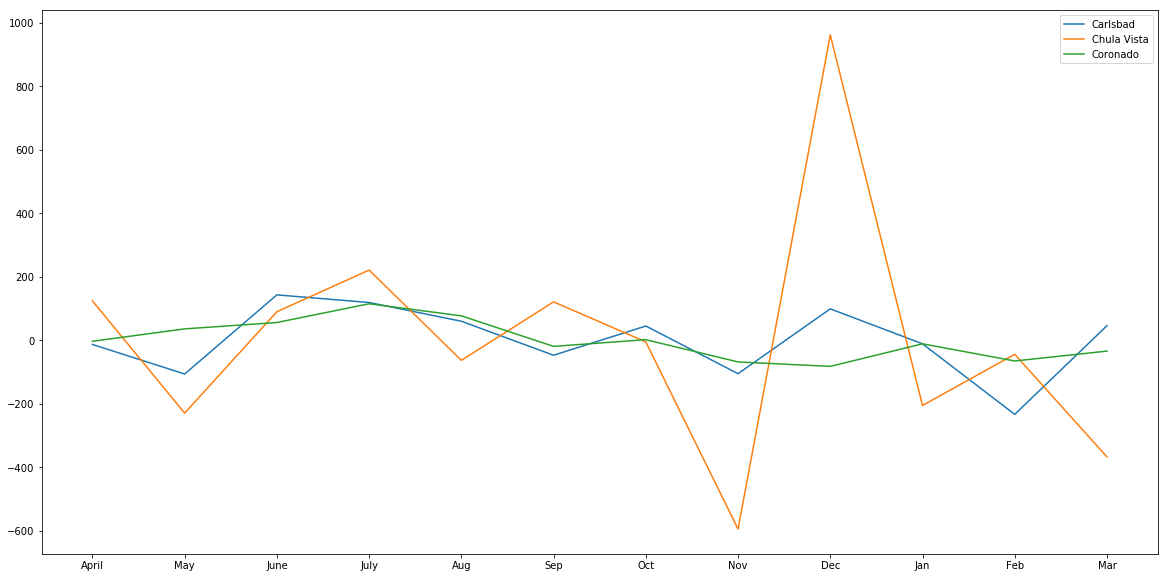

In [41]:
my_xticks = ['April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan','Feb','Mar']
my_labels = ['Carlsbad', 'Chula Vista', 'Coronado']
a = 0
plt.figure(figsize=(20,10))
for i in range(0, 36, 12):
    y =  all_counties[i:i+12]
    plt.plot(x, y, label = my_labels[a])
    a = a + 1
plt.xticks(x, my_xticks)
plt.legend()
plt.show()

From these graphs, we can see that the highest mean deviation from average monthly crime for Carlsbad, Chula Vista, and Coronado are in the months of June, December, and July respectively.

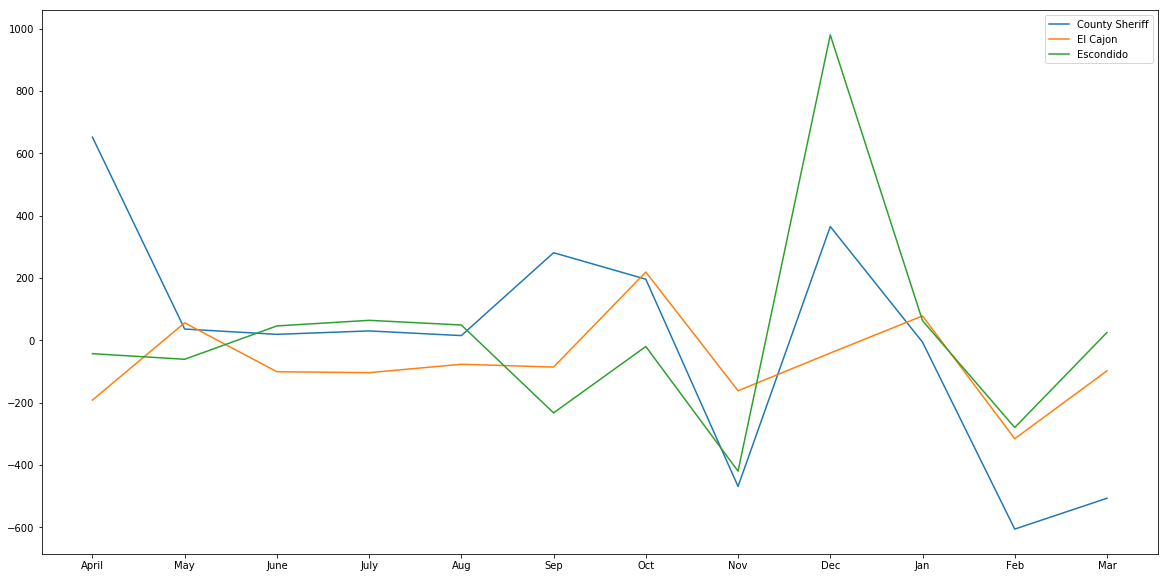

In [37]:
my_xticks = ['April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan','Feb','Mar']
my_labels = ['County Sheriff', 'El Cajon', 'Escondido']
x = [1,2,3,4,5,6,7,8,9,10,11,12]
a = 0
plt.figure(figsize=(20,10))
for i in range(36, 72, 12):
    y =  all_counties[i:i+12]
    plt.plot(x, y, label = my_labels[a])
    a = a + 1
plt.xticks(x, my_xticks)
plt.legend()
plt.show()

From these graphs, we can see that the highest mean deviation from average monthly crime for County Sheriff, El Cajon, and Escondido are in the months of April, October, and December respectively.

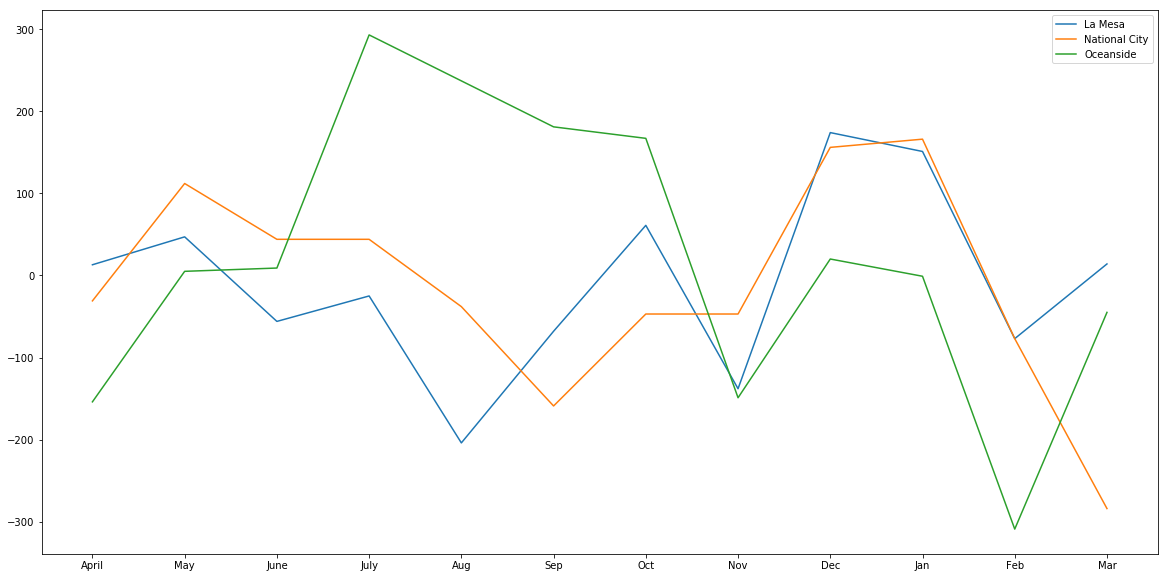

In [38]:
my_xticks = ['April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan','Feb','Mar']
my_labels = ['La Mesa', 'National City', 'Oceanside']
x = [1,2,3,4,5,6,7,8,9,10,11,12]
a = 0
plt.figure(figsize=(20,10))
for i in range(72, 108, 12):
    y =  all_counties[i:i+12]
    plt.plot(x, y, label = my_labels[a])
    a = a + 1
plt.xticks(x, my_xticks)
plt.legend()
plt.show()

From these graphs, we can see that the highest mean deviation from average monthly crime for La Mesa, National City, and Oceanside are in the months of December, January, and July respectively.

# Data Analysis & Results:

To confirm that the months we predicted in the previous part are the highest mean deviation from average monthly crime, we will run a function that displays the value, the month, and the county.

In [87]:
def high_val(data, x, y):
    m = 0
    val = 0
    for i in range(len(data[x:y])):
        val1 = data[x+i]
        if i == 0:
            val = val1
        else:
            if val1 > val:
                val = val1
                m = x+i
    if m%12 == 0:
        month = 'April'
    if m%12 == 1:
        month = 'May'
    if m%12 == 2:
        month = 'June'
    if m%12 == 3:
        month = 'July'
    if m%12 == 4:
        month = 'August'
    if m%12 == 5:
        month = 'September'
    if m%12 == 6:
        month = 'October'
    if m%12 == 7:
        month = 'November'
    if m%12 == 8:
        month = 'December'
    if m%12 == 9:
        month = 'January'
    if m%12 == 10:
        month = 'February'
    if m%12 == 11:
        month = 'March'
    return val, month

cities = ['Carlsbad', 'Chula Vista', 'Coronado', 'County Sheriff', 'El Cajon', 'Escondido', 'La Mesa', 'National City', 'Oceanside']
a = -1
for i in range(0, len(all_counties), 12):
    a += 1
    print(high_val(all_counties, i, i+12), cities[a])
    

(143, 'June') Carlsbad
(961, 'December') Chula Vista
(115, 'July') Coronado
(652, 'April') County Sheriff
(219, 'October') El Cajon
(980, 'December') Escondido
(174, 'December') La Mesa
(166, 'January') National City
(293, 'July') Oceanside


# Conclusion and Discussion